In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Allow us to make a call to the to_categorical function which takes our dataset
# labels as input and reformats them and outputs them in one hot encoded form
from keras.utils.np_utils import to_categorical

In [36]:
n_pts = 500

# Nested list that specifies the coordinates of the center of our clusters.
# Exact position of centers is not too important. However, the following
# positions are chosen to create a small degree of separation between the data
# classes so that they can be effectively classified.
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]

# Makes blobs in different coordinates of the grid. We'll use this function to
# import a dataset. It creates a cluster of datapoints that are all randomly
# centered around a chosen central point for the cluster
# X = datapoints, y = labels
# n_samples = number of sample points
# random_state = a random integer to seed our random generator
# centers = center of each of our clusters
# cluster_std = standard deviation of clustered points around the respective
# centers. 0 means all the points will be generated precisely at the chosen
# center coordinate of the cluster. Higher value means more deviated generated
# data from the center of datapoints.
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
print(X)
print(y)

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]
 [ 1.08583443  0.83913611]
 [ 1.38965297 -0.93588251]
 [-1.58604649 -0.85462178]
 [-0.44909701  0.94272961]
 [ 1.40572155 -1.68359671]
 [-0.71461074 -0.0609578 ]
 [ 0.63020037  0.13222531]
 [ 0.74338976  0.0234151 ]
 [ 1.02112227  0.35169921]
 [-1.40786203  1.06717692]
 [ 0.73537974  0.62811535]
 [-0.53991778  0.49305918]
 [ 1.16554523  1.01893675]
 [-0.19294613  0.43191854]
 [-1.16056577 -0.73060349]
 [ 0.67184979  0.7509346 ]
 [-0.25482897 -0.6659765 ]
 [-0.8742912   0.46949382]
 [ 0.57943063  0.35688003]
 [ 1.16644953 -1.05312047]
 [ 0.82413112  1.43528819]
 [-1.15029996 -1.55188999]
 [-1.50155227  0.7448994 ]
 [ 0.27281391  0.11862263]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [-0.48077467 -0.18831422]
 

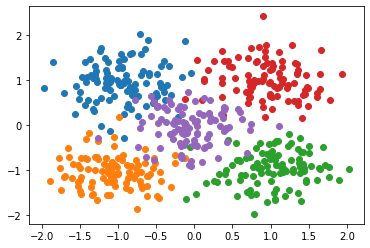

In [37]:
# X[y==0, 0] = Boolean check to grab all x coordinates (0th index) which
# correspond to labels of 0
plt.scatter(X[y==0, 0], X[y==0, 1])

plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [38]:
# Hot encoding of labels to preprocess our data. It eliminates unnecessary
# dependency in our data and ensures our neural network doesn't create
# unjustified relationship between data labels.
# y_cat = newly hot encoded data
# second argument in the to_categorical function is an optional value to
# represents the amount of dataclasses that we have in our datasets. If left
# blank, the function is fed default value which is 3 data classes
y_cat = to_categorical(y, 5)
print(y)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [39]:
# We create a simple network with one input and one output layer
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Note that the hot encoded labels should be used
# Number of epochs is important as we don't want to use insufficient amount,
# which lead to underfitting of the curve, and doesn't capture underlying trend
# of data. At the same time, too many epochs lead to overfitting.
# It is hard to tell how many epochs we need, and highly depends on the dataset
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

# After running this cell, we saw that even 2 epochs was enough

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1624 - accuracy: 0.5291
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8921
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.9443
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9285
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9311
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9385
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.9406
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9304
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9314
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9485
Epoch 11/

In [41]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]

    # model.predict_classes() function is specifically for datasets that are
    # multiclass like ours
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)

    # plt.contourf() function plots distinct contour zones, each of these contour
    # zones represent a disctinct data class
    plt.contourf(xx, yy, z)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


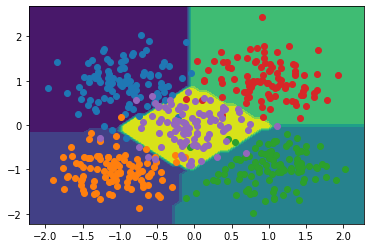

In [42]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is:  [3]


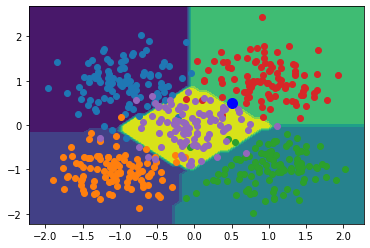

In [43]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = 0.5
y = 0.5
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='b')
print("Prediction is: ", prediction)